In [1]:
#First lets import libraries and modules
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
from sklearn.datasets import load_boston
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import set_config



import pandas as pd
np.random.seed(123)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#next lets import our data as a pandas dataframe
df = pd.read_csv("../data/train.csv")

The name of the data file is very misleading.
this will be all the data we use for our modelling (so it includes training and test)
the file "test.csv" is what we will use to submit our work

In [3]:
df.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741


In [4]:
df.shape

(40455, 11)

In [5]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [6]:
#check for null values
df.isnull().sum().sum()

0

There are no null values in our dataset

In [7]:
#explore values for each variable
df.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.795004,61.751722,57.451133,5.724661,5.727629,3.535011,7.781266
std,11678.496907,0.471700,1.435644,2.230630,1.119617,1.142047,0.707558,1.014051
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,5.787000
25%,10113.500000,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,20227.000000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.781000
75%,30340.500000,1.040000,62.500000,59.000000,6.530000,6.530000,4.030000,8.575000
max,40454.000000,4.500000,79.000000,79.000000,10.230000,58.900000,31.800000,9.843000


x, y and z which stand for measurements of our diamonda have some records at 0, which probably suggests that they are wrong measurements, so we should drop all rows where any of these are zero

In [8]:
df = df.loc[(df[['x','y','z']]!=0).all(axis=1)]
df.shape

(40440, 11)

In [9]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

We see that the columns "cut", "color" and "clarity" are strings not numbers, so we should modify them

In [10]:
#check distinct values for each column
for colname in df.columns:
    print(f"{colname: <12} {df[colname].nunique()}")

id           40440
carat        268
cut          5
color        7
clarity      8
depth        179
table        121
x            543
y            537
z            358
price        3513


In [11]:
#Check correlation between target variable (price) and all others
df.corr()["price"].sort_values()

id      -0.003922
depth   -0.000407
table    0.159908
carat    0.920869
y        0.937314
z        0.937390
x        0.960972
price    1.000000
Name: price, dtype: float64

lets plot a heatmap to visualize these correlations

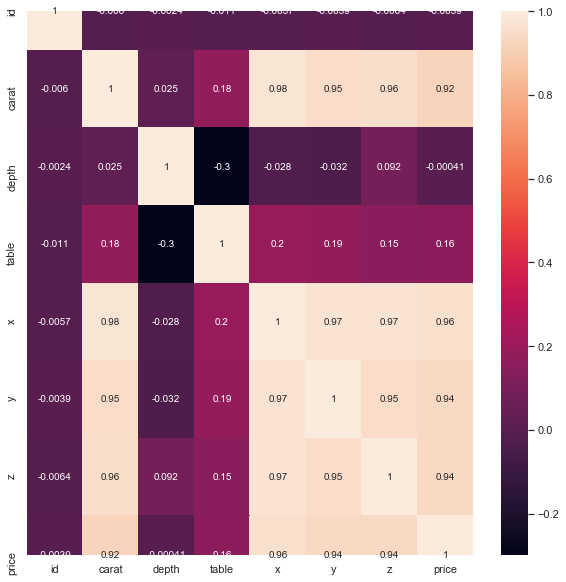

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True);

In [ ]:
sns.pairplot(df , diag_kind = 'kde');

As expected after the correlation analysis we can see that variables x,y,z, and carat have a very nice relation with price while table and depth dont. Also, we can see there is one huge outlier in every table, we should delete it.

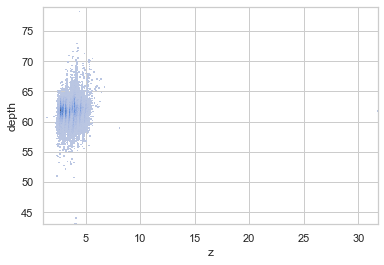

In [13]:
sns.histplot(y='depth', x='z', data=df)


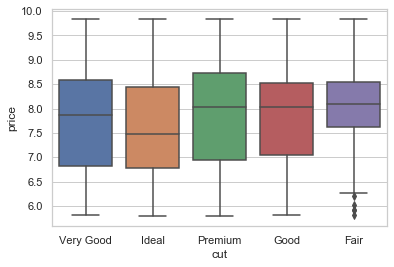

In [14]:
sns.boxplot(y='price', x='cut', data=df)


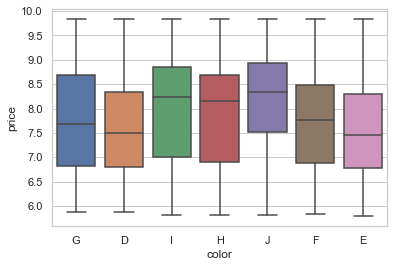

In [15]:
sns.boxplot(y='price', x='color', data=df)

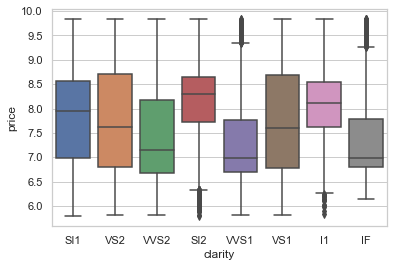

In [16]:
sns.boxplot(y='price', x='clarity', data=df)

In [17]:
#Lets scale our data
scaler = StandardScaler()
scaler.fit(df)
df2 = pd.DataFrame(scaler.transform(df), columns=df.columns)

ValueError: could not convert string to float: 'Very Good'

In [19]:
df.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741


In [20]:
encoded = pd.get_dummies(df)
encoded.head(5)

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.53,63.4,54.0,5.09,5.13,3.24,7.057,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0.41,63.0,56.0,4.80,4.75,3.01,6.824,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.32,61.6,56.0,4.37,4.39,2.70,6.107,0,0,...,1,0,0,0,0,0,0,1,0,0
3,3,0.31,61.2,56.0,4.34,4.37,2.66,6.390,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,1.35,60.5,56.0,7.19,7.12,4.33,8.741,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
#Lets scale our data
scaler = StandardScaler()
scaler.fit(encoded)
df2 = pd.DataFrame(scaler.transform(encoded), columns=encoded.columns)

In [21]:
encoded.head(5)

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.53,63.4,54.0,5.09,5.13,3.24,7.057,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0.41,63.0,56.0,4.80,4.75,3.01,6.824,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.32,61.6,56.0,4.37,4.39,2.70,6.107,0,0,...,1,0,0,0,0,0,0,1,0,0
3,3,0.31,61.2,56.0,4.34,4.37,2.66,6.390,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,1.35,60.5,56.0,7.19,7.12,4.33,8.741,0,0,...,0,1,0,0,0,0,0,1,0,0


In [22]:
encoded.drop(['id',"depth"], axis=1, inplace=True)

Now lets split our data in preparation to train our model(s)

In [23]:
X=encoded.drop(['price'],axis=1)
Y=encoded['price']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)


In [47]:
#1: random forrest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0, max_depth = 100, n_estimators = 100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)


0.06568863333686586

In [ ]:
grid_search_results = pd.DataFrame(gs.cv_results_)

In [ ]:

#create new model which wont use x y or z


modified_for_zero_X=encoded.drop(['price', "x", "y", "z"],axis=1)
modified_for_zero_y=encoded['price']

modified_for_zero_X_train, modified_for_zero_X_test, modified_for_zero_y_train, modified_for_zero_y_test=train_test_split(modified_for_zero_X, modified_for_zero_y,test_size=0.2,random_state=123)

modified_for_zero_X_train.shape

modified_for_zero_rf = RandomForestRegressor(n_estimators = 100)

#the model
modified_for_zero_rf.fit(modified_for_zero_X_train,modified_for_zero_y_train)

modified_for_zero_pred = modified_for_zero_rf.predict(modified_for_zero_X_test)


mean_absolute_error(modified_for_zero_y_test, modified_for_zero_pred)